In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve

# Helper methods

In [2]:
def save(path):
    plt.savefig('../../images' + path)
    
def loadDataSet():
#     df  = pd.read_csv("../input/stroke-dataset/stroke_subset.csv")
    return pd.read_csv("../input/stroke-dataset/stroke.csv")

In [3]:


df=loadDataSet();
df = df.drop('id',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


# Data Exploration

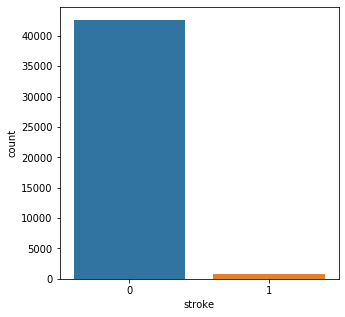

In [4]:
plt.figure(figsize=(5,5))
sns.countplot(x='stroke',data=df)
save('/building_ann/stroke_countplot.png')

In [5]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.272169,0.250188,0.237627,0.358897,0.156049
hypertension,0.272169,1.000000,0.119777,0.160211,0.161225,0.075332
heart_disease,0.250188,0.119777,1.000000,0.146938,0.057677,0.113763
avg_glucose_level,0.237627,0.160211,0.146938,1.000000,0.191295,0.078917
bmi,0.358897,0.161225,0.057677,0.191295,1.000000,0.020285
stroke,0.156049,0.075332,0.113763,0.078917,0.020285,1.000000


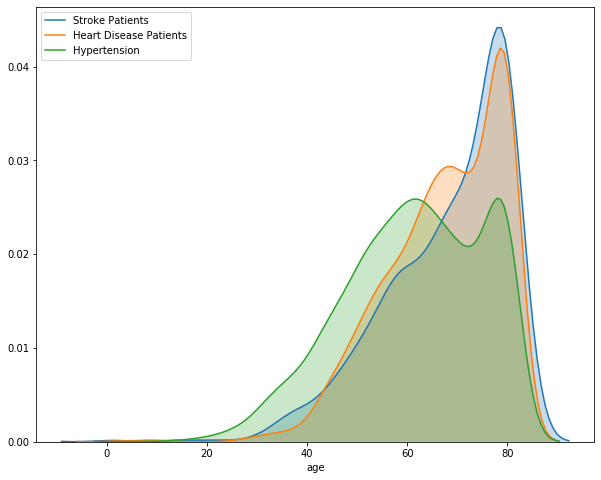

In [6]:
plt.figure(figsize=(10,8))
sns.distplot(df.loc[df['stroke'] == 1]['age'], label='Stroke Patients', kde_kws={"shade": True},hist=False, bins =20)
sns.distplot(df.loc[df['heart_disease'] == 1]['age'], label='Heart Disease Patients', kde_kws={"shade": True},hist=False, bins =20)
sns.distplot(df.loc[df['hypertension'] == 1]['age'], label='Hypertension', kde_kws={"shade": True},hist=False, bins =20)
plt.legend()
save('/building_ann/stroke_age_distplot.png')

In [7]:
df['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [8]:
df.iloc[95]


gender                          Male
age                               34
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             106.23
bmi                              NaN
smoking_status       formerly smoked
stroke                             0
Name: 95, dtype: object

In [9]:
# def fill_smoking_status(smoking_status):
#     if pd.isnull(smoking_status):
#         return np.nan
#     elif smoking_status=='never smoked':
#         return 0
#     elif smoking_status=='formerly smoked':
#         return 1
#     else: 
#         return 3
# df['smoking_status'] = df.apply(lambda x : fill_smoking_status(x['smoking_status']), axis=1)



# plt.figure(figsize=(9,9))
# sns.heatmap(df.corr(),annot=True,cmap='viridis')
# plt.ylim(9, 0)
# # plt.xlim(0, 1)

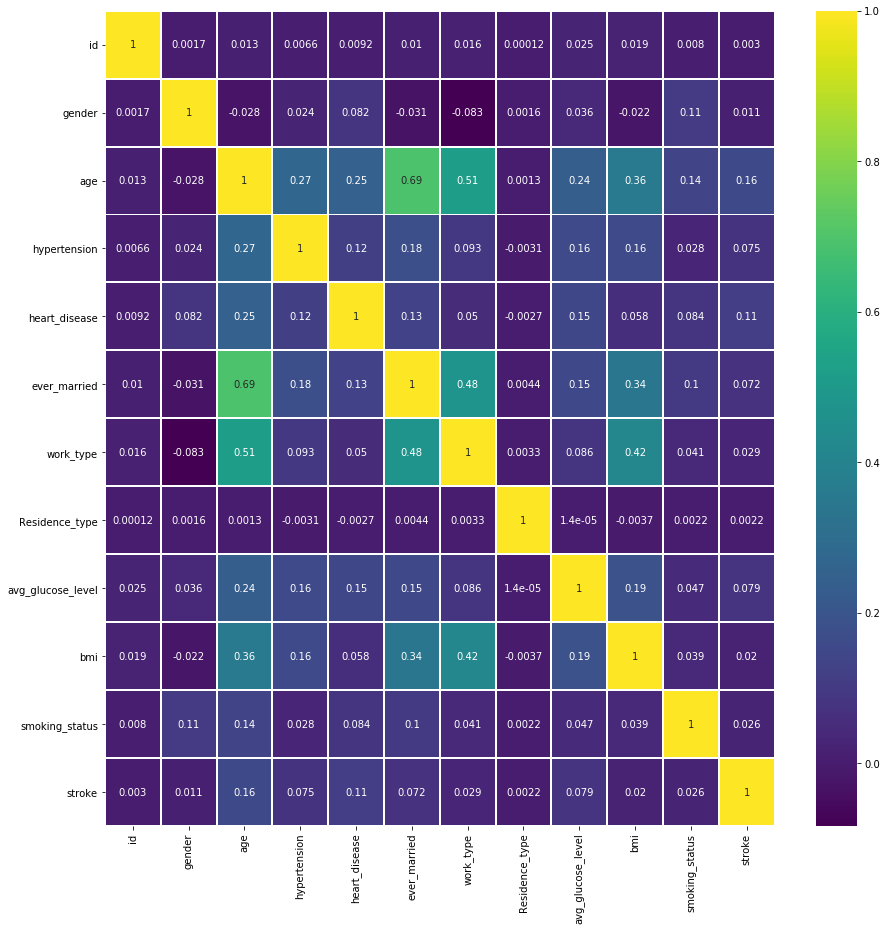

In [10]:
def map_smoking_status(smoking_status):
    if pd.isnull(smoking_status):
        return np.nan
    elif smoking_status=='never smoked':
        return 0
    elif smoking_status=='formerly smoked':
        return 1
    else: 
        return 1
def fill_work_type(work_type):
    if work_type == 'children':
        return 0
    elif work_type == 'Never_worked':
        return 1
    elif work_type == 'Self-employed':
        return 2
    elif work_type == 'Private':
        return 3
    else: 
        return 4
df_hm = loadDataSet()
df_hm['smoking_status'] = df_hm.apply(lambda x : map_smoking_status(x['smoking_status']), axis=1)
df_hm['ever_married'] = df_hm.apply(lambda x : 1 if x['ever_married']=='Yes' else 0, axis =1)
df_hm['Residence_type'] = df_hm.apply(lambda x : 1 if x['Residence_type']=='Urban' else 0, axis =1)
df_hm['work_type'] = df_hm.apply(lambda x : fill_work_type(x['work_type']), axis =1)
df_hm['gender'] = df_hm.apply(lambda x : 1 if x['gender']=='Male' else 0, axis =1)

plt.figure(figsize=(15,15))
sns.heatmap(df_hm.corr(),annot=True,cmap='viridis', linewidth=1)
plt.ylim(12, 0)
save('/building_ann/heatmap.png')

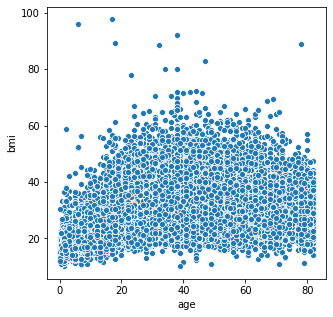

In [11]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='age',y='bmi',data=df)
save('/building_ann/age_bmi_scatterplot.png')

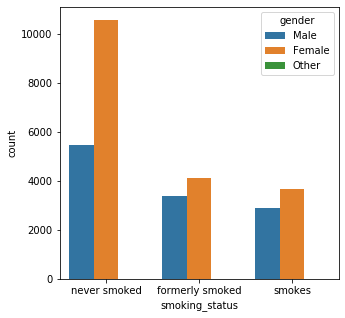

In [12]:
plt.figure(figsize=(5,5))
df = loadDataSet()
sns.countplot(x='smoking_status',data=df,hue='gender')
save('/building_ann/smoking_scatterplot.png')

In [13]:
len(df[df['stroke'] == 1 ])/len(df)

0.01804147465437788

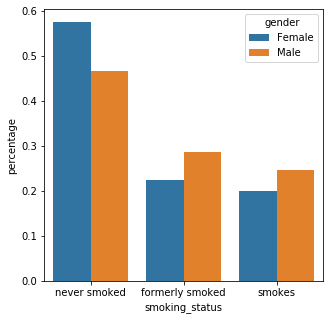

In [65]:
# Adapted code from: https://github.com/mwaskom/seaborn/issues/1027
plt.figure(figsize=(5,5))
df = loadDataSet()
genderOther = df[ df['gender'] == 'Other' ].index
df.drop(genderOther , inplace=True)
x, y, hue = "smoking_status", "percentage", "gender"
hue_order = ["Male", "Female"]

#f, axes = plt.subplots(1, 2)
# sns.countplot(x=x, hue=hue, data=df, ax=axes[0])
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)#, ax=axes[1])
save('/building_ann/gender_smoking_percentage.png')

count      43389
unique         2
top       Female
freq       25665
Name: gender, dtype: object

In [15]:

stroke_y = df[df['stroke'] == 1 ].groupby("smoking_status").count()['stroke']
stroke_n = df[df['stroke'] == 0 ].groupby("smoking_status").count()['stroke']
print(stroke_y/(stroke_y + stroke_n))

smoking_status
formerly smoked    0.029494
never smoked       0.017691
smokes             0.020268
Name: stroke, dtype: float64


In [16]:
df.groupby("smoking_status")['stroke'].value_counts(normalize=True)

smoking_status   stroke
formerly smoked  0         0.970506
                 1         0.029494
never smoked     0         0.982309
                 1         0.017691
smokes           0         0.979732
                 1         0.020268
Name: stroke, dtype: float64

In [17]:
np.bincount(df.apply(lambda x : 1 if x['gender']=='Male' else 0, axis =1))

array([25676, 17724], dtype=int64)

In [18]:
np.bincount(df['stroke'])

array([42617,   783], dtype=int64)

In [19]:
# def fill_smoking_status(smoking_status, isMale):
#     if smoking_status=='never smoked':
#         return 0
#     else: 
#         return isMale if pd.isnull(smoking_status) else 1
# df['smoking_status'] = df.apply(lambda x : fill_smoking_status(x['smoking_status'], x['Male']), axis=1)



# plt.figure(figsize=(9,9))
# sns.heatmap(df.corr(),annot=True,cmap='viridis')
# plt.ylim(9, 0)
# # plt.xlim(0, 1)

# Missing Data

In [20]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [21]:
df = loadDataSet()
neg, pos = np.bincount(df['stroke'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 43400
    Positive: 783 (1.80% of total)



In [22]:


def fill_smoking_status(smoking_status, work_type, gender):
    if not pd.isnull(smoking_status):
        return smoking_status
    if work_type=='children' or gender =='Female':
        return 'never smoked'
    return 'smokes'

df['smoking_status'] = df.apply(lambda x : fill_smoking_status(x['smoking_status'], x['work_type'], x['gender']), axis=1)

smoking_dummies = pd.get_dummies(df['smoking_status'],drop_first=True)
df = pd.concat([df.drop('smoking_status',axis=1),smoking_dummies],axis=1)

df['gender'] = df['gender'].replace(["Other"], "Male")
gender_dummies = pd.get_dummies(df['gender'],drop_first=True)
df = pd.concat([df.drop('gender',axis=1),gender_dummies],axis=1)

bmi_avg= df.groupby('work_type').mean()['bmi']
df['bmi'] = df.apply(lambda x : bmi_avg[x['work_type']] if np.isnan(x['bmi']) else x['bmi'], axis =1)


work_type_dummies = pd.get_dummies(df['work_type'],drop_first=True)
df = pd.concat([df.drop('work_type',axis=1),work_type_dummies],axis=1)

married_dummies = pd.get_dummies(df['ever_married'],drop_first=True)
df = pd.concat([df.drop('ever_married',axis=1),married_dummies],axis=1)
df = df.rename(columns={'Yes': 'Married'})

residence_dummies = pd.get_dummies(df['Residence_type'],drop_first=True)
df = pd.concat([df.drop('Residence_type',axis=1),residence_dummies],axis=1)

df = df.drop('id',axis=1)


df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,never smoked,smokes,Male,Never_worked,Private,Self-employed,children,Married,Urban
0,3.0,0,0,95.12,18.0,0,1,0,1,0,0,0,1,0,0
1,58.0,1,0,87.96,39.2,0,1,0,1,0,1,0,0,1,1
2,8.0,0,0,110.89,17.6,0,1,0,0,0,1,0,0,0,1
3,70.0,0,0,69.04,35.9,0,0,0,0,0,1,0,0,1,0
4,14.0,0,0,161.28,19.1,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4,0,1,0,0,0,0,0,1,0,1
43396,56.0,0,0,213.61,55.4,0,0,0,0,0,0,0,0,1,1
43397,82.0,1,0,91.94,28.9,0,0,0,0,0,1,0,0,1,1
43398,40.0,0,0,99.16,33.2,0,1,0,1,0,1,0,0,1,1


In [23]:

df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
never smoked         0
smokes               0
Male                 0
Never_worked         0
Private              0
Self-employed        0
children             0
Married              0
Urban                0
dtype: int64

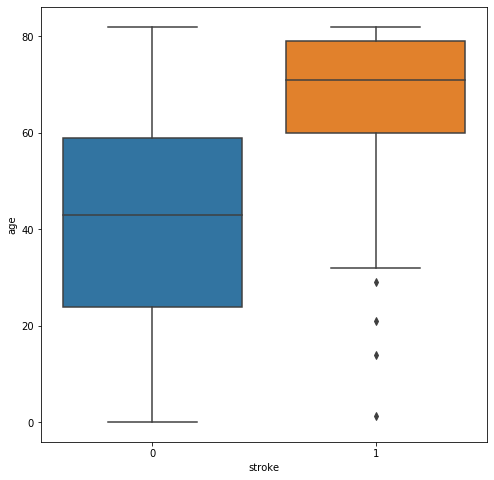

In [24]:
plt.figure(figsize=(8,8))
sns.boxplot(x='stroke',y='age',data=df)

In [25]:
# # sorted(df['smoking_status'].unique())
# plt.figure(figsize=(10,10))
# sns.countplot(x='stroke',data=df,hue='smoking_status')

In [26]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,never smoked,smokes,Male,Never_worked,Private,Self-employed,children,Married,Urban
age,1.000000,0.272169,0.250188,0.237627,0.359555,0.156049,-0.272598,0.098102,-0.027768,-0.069509,0.143657,0.326913,-0.641240,0.693070,0.001299
hypertension,0.272169,1.000000,0.119777,0.160211,0.158361,0.075332,-0.069020,0.015910,0.023902,-0.019319,0.007236,0.100243,-0.130171,0.176575,-0.003124
heart_disease,0.250188,0.119777,1.000000,0.146938,0.058548,0.113763,-0.107726,0.050831,0.082270,-0.014292,-0.006327,0.099342,-0.089559,0.128833,-0.002743
avg_glucose_level,0.237627,0.160211,0.146938,1.000000,0.188248,0.078917,-0.077354,0.022725,0.035695,-0.014516,0.008048,0.080246,-0.114174,0.153607,0.000014
bmi,0.359555,0.158361,0.058548,0.188248,1.000000,0.022308,-0.169780,0.089119,-0.020754,-0.021918,0.203401,0.084054,-0.462608,0.342836,-0.003619
stroke,0.156049,0.075332,0.113763,0.078917,0.022308,1.000000,-0.041869,0.013496,0.011281,-0.008674,-0.002464,0.061195,-0.054115,0.071920,0.002247
never smoked,-0.272598,-0.069020,-0.107726,-0.077354,-0.169780,-0.041869,1.000000,-0.662072,-0.225694,0.017758,-0.133841,-0.080128,0.313639,-0.223303,-0.000834
smokes,0.098102,0.015910,0.050831,0.022725,0.089119,0.013496,-0.662072,1.000000,0.229783,-0.002135,0.119038,0.019908,-0.216328,0.106108,0.004874
Male,-0.027768,0.023902,0.082270,0.035695,-0.020754,0.011281,-0.225694,0.229783,1.000000,0.002700,-0.052028,-0.002953,0.089127,-0.031183,0.001558
Never_worked,-0.069509,-0.019319,-0.014292,-0.014516,-0.021918,-0.008674,0.017758,-0.002135,0.002700,1.000000,-0.074011,-0.027566,-0.026017,-0.080734,0.003089


In [27]:
df.isnull().sum()
df[np.isnan(df['bmi'])]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,never smoked,smokes,Male,Never_worked,Private,Self-employed,children,Married,Urban


In [28]:
# plt.figure(figsize=(17,8))
# age_len = age_1/age_0
# age_len.plot(kind = 'bar')

## Split Data

In [29]:
from sklearn.model_selection import train_test_split
df=df.sample(frac=1)

In [30]:
X = df.drop('stroke', axis =1).values
X

array([[64.,  0.,  0., ...,  0.,  1.,  0.],
       [31.,  0.,  0., ...,  0.,  1.,  1.],
       [60.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [47.,  0.,  0., ...,  0.,  1.,  1.],
       [31.,  0.,  0., ...,  0.,  1.,  0.],
       [ 2.,  0.,  0., ...,  1.,  0.,  0.]])

In [31]:
y = df['stroke'].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from datetime import datetime

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

time = datetime.now().strftime("%Y-%m-%d--%H%M")
logdir = 'logs\\hparam_tuning'
# board = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images = True, 
#                     update_freq='epoch', profile_batch=2, embeddings_freq=1)

In [35]:

model = Sequential()
# input layer
model.add(Dense(39,  activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.1))

# # hidden layer
# model.add(Dense(18, activation='relu'))
# model.add(Dropout(0.1))

# hidden layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'] )

weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

# weights = {0:1, 1:54}
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          class_weight=class_weight,
          batch_size=2048,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks = [early_stop]
          )


Weight for class 0: 0.51
Weight for class 1: 27.71
Train on 34720 samples, validate on 8680 samples
Epoch 1/400
34720/34720 [==============================] - 2s 56us/sample - loss: 0.6622 - accuracy: 0.5250 - val_loss: 0.6530 - val_accuracy: 0.4992
Epoch 2/400
34720/34720 [==============================] - 0s 6us/sample - loss: 0.6305 - accuracy: 0.5654 - val_loss: 0.6245 - val_accuracy: 0.6725
Epoch 3/400
34720/34720 [==============================] - 0s 6us/sample - loss: 0.6024 - accuracy: 0.6270 - val_loss: 0.5931 - val_accuracy: 0.6164
Epoch 4/400
34720/34720 [==============================] - 0s 7us/sample - loss: 0.5840 - accuracy: 0.6231 - val_loss: 0.5722 - val_accuracy: 0.7096
Epoch 5/400
34720/34720 [==============================] - 0s 7us/sample - loss: 0.5702 - accuracy: 0.6489 - val_loss: 0.5538 - val_accuracy: 0.6841
Epoch 6/400
34720/34720 [==============================] - 0s 6us/sample - loss: 0.5623 - accuracy: 0.6649 - val_loss: 0.5400 - val_accuracy: 0.6653
Epoch

Epoch 55/400
34720/34720 [==============================] - 0s 6us/sample - loss: 0.4600 - accuracy: 0.7151 - val_loss: 0.4813 - val_accuracy: 0.7407
Epoch 56/400
34720/34720 [==============================] - 0s 6us/sample - loss: 0.4690 - accuracy: 0.7241 - val_loss: 0.4788 - val_accuracy: 0.7286
Epoch 57/400
34720/34720 [==============================] - 0s 6us/sample - loss: 0.4673 - accuracy: 0.7151 - val_loss: 0.4783 - val_accuracy: 0.7145
Epoch 58/400
34720/34720 [==============================] - 0s 6us/sample - loss: 0.4647 - accuracy: 0.7174 - val_loss: 0.4802 - val_accuracy: 0.7298
Epoch 59/400
34720/34720 [==============================] - 0s 6us/sample - loss: 0.4630 - accuracy: 0.7200 - val_loss: 0.4791 - val_accuracy: 0.7236
Epoch 60/400
34720/34720 [==============================] - 0s 6us/sample - loss: 0.4749 - accuracy: 0.7063 - val_loss: 0.4781 - val_accuracy: 0.7266
Epoch 61/400
34720/34720 [==============================] - 0s 6us/sample - loss: 0.4560 - accuracy:

In [36]:
# from tensorboard.plugins.hparams import api as hp
# HP_NUM_UNITS_L1 = hp.HParam('num_units_l1', hp.Discrete([16, 32]))
# HP_NUM_UNITS_L2 = hp.HParam('num_units_l2', hp.Discrete([8,4]))
# HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
# HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

# METRIC_ACCURACY = 'accuracy'

# with tf.summary.create_file_writer('logs\\hparam_tuning').as_default():
#     hp.hparams_config(
#         hparams=[HP_NUM_UNITS_L1,HP_NUM_UNITS_L2, HP_DROPOUT, HP_OPTIMIZER],
#         metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
#   )

# def train_test_model(hparams):
#     model = Sequential()
#     # input layer
#     model.add(Dense(hparams[HP_NUM_UNITS_L1],  activation='relu'))
#     model.add(Dropout(hparams[HP_DROPOUT]))

#     # hidden layer
#     model.add(Dense(hparams[HP_NUM_UNITS_L2], activation='relu'))
#     model.add(Dropout(hparams[HP_DROPOUT]))
    
#     model.add(Dense(8, activation='relu'))
#     model.add(Dropout(hparams[HP_DROPOUT]))
#     # output layer
#     model.add(Dense(units=1,activation='sigmoid'))

#     # Compile model
#     model.compile(loss='binary_crossentropy', optimizer=hparams[HP_OPTIMIZER],  metrics=['accuracy'])
    
#     model.fit(x=X_train, 
#           y=y_train, 
#           epochs=400,
#           validation_data=(X_test, y_test), 
#           verbose=1,
#           callbacks = [early_stop,
#                        tf.keras.callbacks.TensorBoard(logdir),  # log metrics
#                         hp.KerasCallback(logdir, hparams)]
#           )
    
#     _, accuracy = model.evaluate(X_test, y_test)
    
#     return accuracy

# def run(run_dir, hparams):
#     with tf.summary.create_file_writer(run_dir).as_default():
#         hp.hparams(hparams)  # record the values used in this trial
#         accuracy = train_test_model(hparams)
#         tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

# session_num = 0

# for num_units_l1 in HP_NUM_UNITS_L1.domain.values:
#     for num_units_l2 in HP_NUM_UNITS_L2.domain.values:
#         for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
#             for optimizer in HP_OPTIMIZER.domain.values:
#               hparams = {
#                   HP_NUM_UNITS_L1: num_units_l1,
#                   HP_NUM_UNITS_L2: num_units_l2,
#                   HP_DROPOUT: dropout_rate,
#                   HP_OPTIMIZER: optimizer,
#               }
#               run_name = "run-%d" % session_num
#               print('--- Starting trial: %s' % run_name)
#               print({h.name: hparams[h] for h in hparams})
#               run('logs\\hparam_tuning' + run_name, hparams)
#               session_num += 1

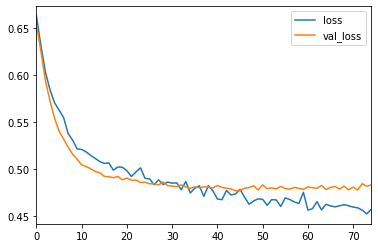

In [37]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:

predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      8521
           1       0.05      0.81      0.10       159

    accuracy                           0.74      8680
   macro avg       0.53      0.78      0.48      8680
weighted avg       0.98      0.74      0.84      8680



True Negatives:  6304
False Positives:  2217
False Negatives:  30
True Positives:  129
Total Fraudulent Transactions:  159


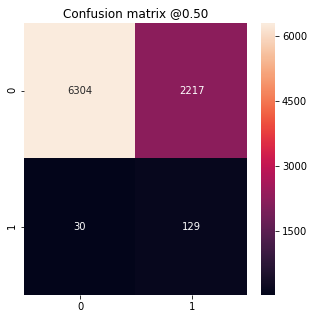

In [40]:
# part of this code is taken from https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
#   plt.ylabel('Actual label')
#   plt.xlabel('Predicted label')
  plt.ylim(2, 0)
  print('True Negatives: ', cm[0][0])
  print('False Positives: ', cm[0][1])
  print('False Negatives: ', cm[1][0])
  print('True Positives: ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))
plot_cm(y_test,predictions)    

In [41]:
roc_curve(y_test,predictions)

(array([0.        , 0.26018073, 1.        ]),
 array([0.        , 0.81132075, 1.        ]),
 array([2, 1, 0]))

In [42]:
len(predictions)

8680

In [43]:
row = 300
patient = df.drop('stroke', axis = 1).iloc[row]
patient

age                   75.00
hypertension           1.00
heart_disease          0.00
avg_glucose_level    203.48
bmi                   34.90
never smoked           0.00
smokes                 1.00
Male                   0.00
Never_worked           0.00
Private                1.00
Self-employed          0.00
children               0.00
Married                1.00
Urban                  1.00
Name: 36605, dtype: float64

In [44]:
patient = scaler.transform(patient.values.reshape(1,13))
patient

ValueError: cannot reshape array of size 14 into shape (1,13)

In [ ]:
model.predict_classes(patient)[0][0]

In [ ]:
for row in range (0,10):
    patient = df.drop('stroke', axis = 1).iloc[row]
    patient = scaler.transform(patient.values.reshape(1,13))
    prediction = (model.predict_classes(patient))[0][0]
    print ("Predicted:{} Actual:{}".format(prediction,df.iloc[row]['stroke']))